### Search terms used in pubmed "novel coronavirus or covid-19 or coronavirus disease-2019". 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import re
import requests
from urllib.request import Request, urlopen
pd.options.display.max_rows = 15000
pd.options.display.max_columns = 15000
%matplotlib inline

In [2]:
covid19 = pd.read_csv('../data/covid19.csv', sep = ",")
impact_factor = pd.read_csv('../data/JournalHomeGrid.csv', header = 1)
impact_factor.columns = ['Rank', 'journal_title', 'total_cites', 'impact_factor',
       'eigenfactor_score']

In [3]:
covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 12 columns):
PMID                   4930 non-null int64
Title                  4926 non-null object
ISOAbbreviation        4925 non-null object
journal_title          4930 non-null object
Abstract               3181 non-null object
Journalinfo_country    4930 non-null object
Published_year         4930 non-null int64
Keyword_list           1807 non-null object
publication_type       4930 non-null object
medline_citation       4930 non-null object
pubmed_year            4930 non-null int64
Affiliation            4610 non-null object
dtypes: int64(3), object(9)
memory usage: 462.3+ KB


In [4]:
covid19[covid19.PMID== 32220310]

,PMID,Title,ISOAbbreviation,journal_title,Abstract,Journalinfo_country,Published_year,Keyword_list,publication_type,medline_citation,pubmed_year,Affiliation
1288,32220310,A Genomic Perspective on the Origin and Emerge...,Cell,Cell,The ongoing pandemic of a new human coronaviru...,United States,2020,NaN,Journal Article,Publisher,2020,Shanghai Public Health Clinical Center and Sch...


In [5]:
covid19[covid19.journal_title=='Cell']

,PMID,Title,ISOAbbreviation,journal_title,Abstract,Journalinfo_country,Published_year,Keyword_list,publication_type,medline_citation,pubmed_year,Affiliation
1288,32220310,A Genomic Perspective on the Origin and Emerge...,Cell,Cell,The ongoing pandemic of a new human coronaviru...,United States,2020,NaN,Journal Article,Publisher,2020,Shanghai Public Health Clinical Center and Sch...
2343,32155444,"Structure, Function, and Antigenicity of the S...",Cell,Cell,The emergence of SARS-CoV-2 has resulted in >9...,United States,2020,"SARS-CoV,SARS-CoV-2,antibodies,coronavirus,cry...",Journal Article,Publisher,2020,"Department of Biochemistry, University of Wash..."
2474,32142651,SARS-CoV-2 Cell Entry Depends on ACE2 and TMPR...,Cell,Cell,"The recent emergence of the novel, pathogenic ...",United States,2020,"ACE2,COVID-19,SARS-CoV-2,TMPRSS2,coronavirus,e...",Journal Article,Publisher,2020,"Infection Biology Unit, German Primate Center ..."
2906,32078801,The Novel Coronavirus Outbreak: What We Know a...,Cell,Cell,NaN,United States,2020,NaN,Journal Article,In-Data-Review,2020,NaN


In [6]:
impact_factor['journal_title'] = impact_factor.journal_title.str.lower()
#impact_factor[impact_factor.journal_title.str.contains('sensors', na= False)]
covid19.journal_title = covid19.journal_title.str.lower()
#covid19['journal_title'] = covid19['journal_title'].str.replace('(\s\:.*$)',"") # removes : in journal titile
#covid19.journal_title = covid19.journal_title.str.replace("(\(.*\))", '').str.strip()

In [7]:
covid19['Published_year'] = pd.to_numeric(covid19['Published_year'])
covid19.publication_type = covid19.publication_type.str.replace('Journal Article,', "", regex = True)
covid19.publication_type = covid19.publication_type.str.replace(',Journal Article', "", regex = True)

In [8]:
covid19['journal_title'] = covid19['journal_title'].str.title()
impact_factor['journal_title'] = impact_factor['journal_title'].str.title()

In [9]:
# merge dataframes
covid19 = covid19.merge(impact_factor, left_on = 'journal_title', right_on = 'journal_title', how = 'left')

In [10]:
covid19.head()

,PMID,Title,ISOAbbreviation,journal_title,Abstract,Journalinfo_country,Published_year,Keyword_list,publication_type,medline_citation,pubmed_year,Affiliation,Rank,total_cites,impact_factor,eigenfactor_score
0,32259899,Urgent need for individual mobile phone and in...,Rev Cardiovasc Med,Reviews In Cardiovascular Medicine,Approximately 90 days of the SARS-CoV-2 (COVID...,United States,2020,"COVID-19,SARS-CoV-2,critical care; mortality,e...",Journal Article,Publisher,2020,"Baylor University Medical Center, Dallas TX 75...",11067,262,0.610,0.00040
1,32259878,A case of exacerbation of psoriasis after osel...,Dermatol Ther,Dermatologic Therapy,NaN,United States,2020,"COVID-19,coronavirus,hydroxychloroquine,oselta...",Journal Article,Publisher,2020,"Department of Dermatology and Venereology, Uşa...",6261,"1,753",1.740,0.00207
2,32259853,Nuclear medicine in SARS-CoV-2 pandemia: 18F-F...,Nuklearmedizin,Nuklearmedizin. Nuclear Medicine,The current outbreak of coronavirus SARS-CoV-2...,Germany,2020,NaN,Journal Article,Publisher,2020,"Department of Nuclear Medicine, University Hos...",NaN,NaN,NaN,NaN
3,32259829,COVID-19 Outbreak: An Overview.,Chemotherapy,Chemotherapy,"In late December 2019, Chinese health authorit...",Switzerland,2020,"COVID-19,Pandemic,Phylogenesis,Protein modelin...",Review,Publisher,2020,"Virology Unit, Laboratory of Clinical Microbio...",6871,"1,466",1.571,0.00092
4,32259751,How should we implement radiotherapy for cance...,Radiother Oncol,Radiotherapy And Oncology : Journal Of The Eur...,NaN,Ireland,2020,NaN,Letter,Publisher,2020,The Cancer Center of the Fifth Affiliated Hosp...,NaN,NaN,NaN,NaN



## Analysis manuscript without review articles

In [11]:
minus_reviews =covid19[~covid19.publication_type.str.contains("Review|Comment|Editorial|Letter|Published Erratum")==True]
minus_reviews.publication_type.value_counts()

Journal Article                                               3128
English Abstract                                               169
Case Reports                                                   104
Comparative Study                                               47
News                                                            45
Evaluation Study                                                35
Comparative Study,Evaluation Study                              11
Historical Article                                               6
Validation Study                                                 6
Practice Guideline                                               5
Congress                                                         4
Video-Audio Media                                                4
Multicenter Study                                                3
Observational Study                                              3
Interview                                                     

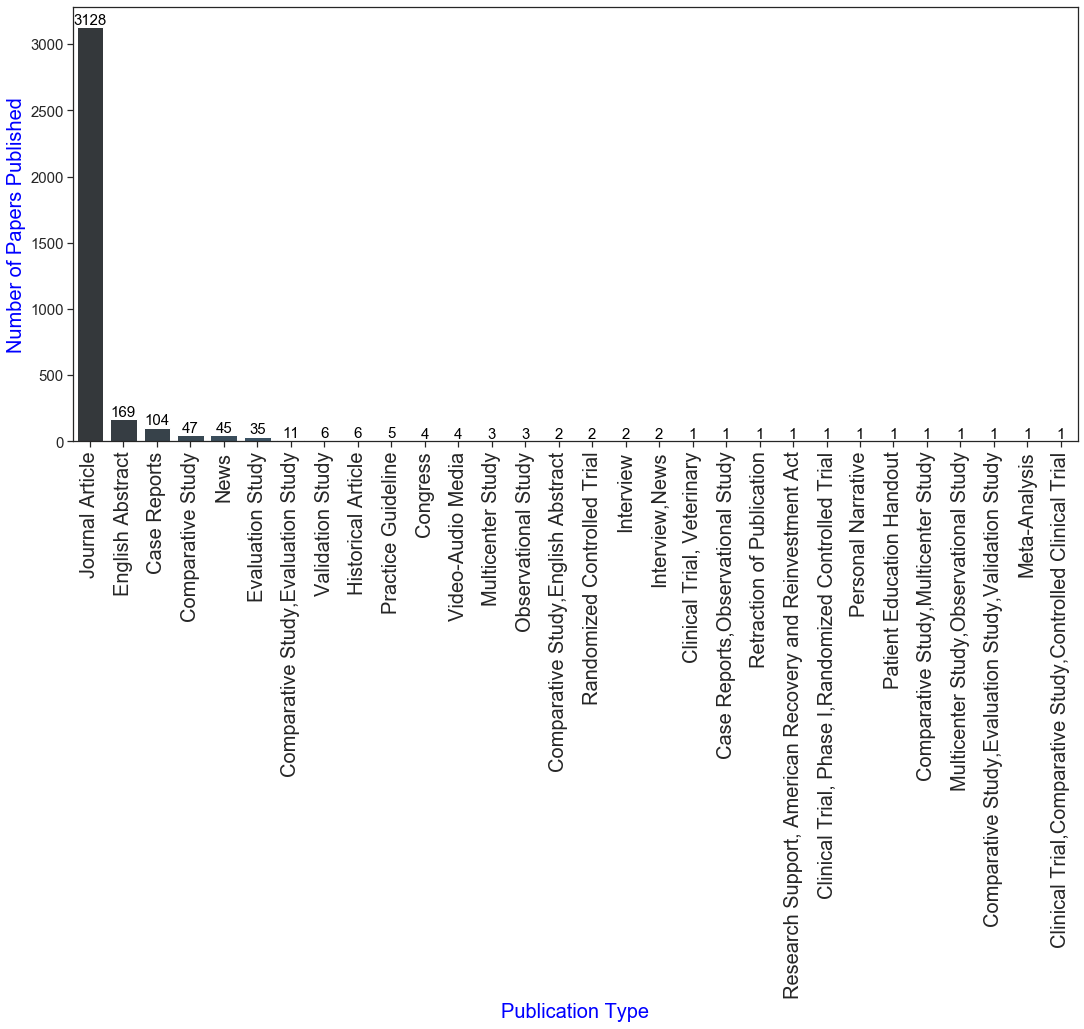

In [12]:
sns.set(rc={'figure.figsize':(18,8)}, style ='white' )
sns.set_style("ticks")
publication_type = minus_reviews.groupby('publication_type')['PMID'].count().reset_index()\
                        .sort_values('PMID', ascending =False).reset_index(drop= True).head(30)
ax =sns.barplot(x = 'publication_type', y = 'PMID', data = publication_type, palette ="Blues_d")
plt.xlabel('Publication Type',fontsize = 20, color = 'blue')
plt.ylabel('Number of Papers Published',fontsize = 20, color = 'blue')
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 15)
for index, row in publication_type.iterrows():
    ax.text(row.name,row.PMID, round(row.PMID),color='black', ha="center",fontsize = 15, va='bottom')#, clip_on= True);


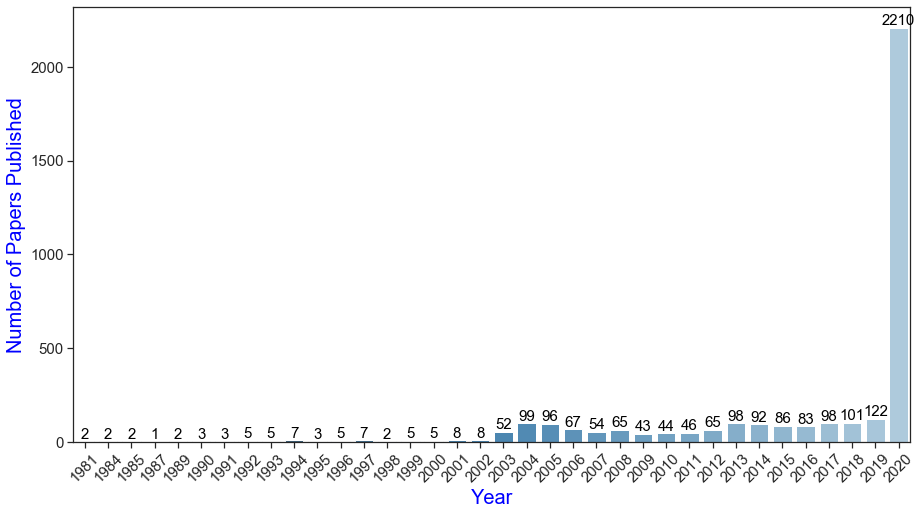

In [18]:
sns.set(rc={'figure.figsize':(15,8)}, style ='white' )
sns.set_style("ticks")
num_published_year= minus_reviews.groupby('Published_year')['PMID'].count().reset_index()\
                        .sort_values('Published_year', ascending =False)
g =sns.barplot(x = 'Published_year', y = 'PMID', data = num_published_year, palette ="Blues_d")
plt.xlabel('Year',fontsize = 20, color = 'blue')
plt.ylabel('Number of Papers Published',fontsize = 20, color = 'blue')
plt.xticks(fontsize = 15, rotation = 45)
plt.yticks(fontsize = 15)
for index, row in num_published_year.iterrows():
    g.text(row.name,row.PMID, round(row.PMID), color='black', ha="center", fontsize = 15, va='bottom')
plt.savefig("../data/numbers_per_year.png")
plt.show();

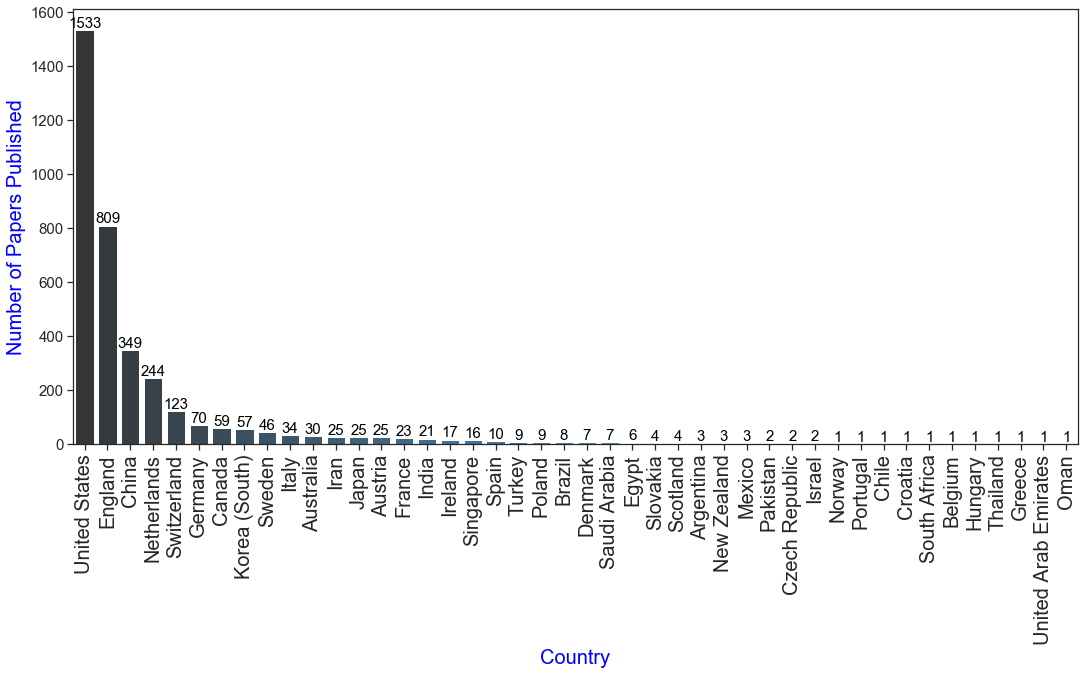

In [14]:
sns.set(rc={'figure.figsize':(18,8)}, style ='white')
sns.set_style("ticks")
num_published_country= minus_reviews.groupby('Journalinfo_country')['PMID'].count().reset_index()\
                        .sort_values('PMID', ascending =False).reset_index(drop= True)\

g =sns.barplot(x = 'Journalinfo_country', y = 'PMID', data = num_published_country, palette ="Blues_d")
plt.xlabel('Country',fontsize = 20, color = 'blue')
plt.ylabel('Number of Papers Published',fontsize = 20, color = 'blue')
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 15)
for index, row in num_published_country.iterrows():
    g.text(row.name,row.PMID, round(row.PMID), color='black', ha="center", fontsize = 15, va='bottom');

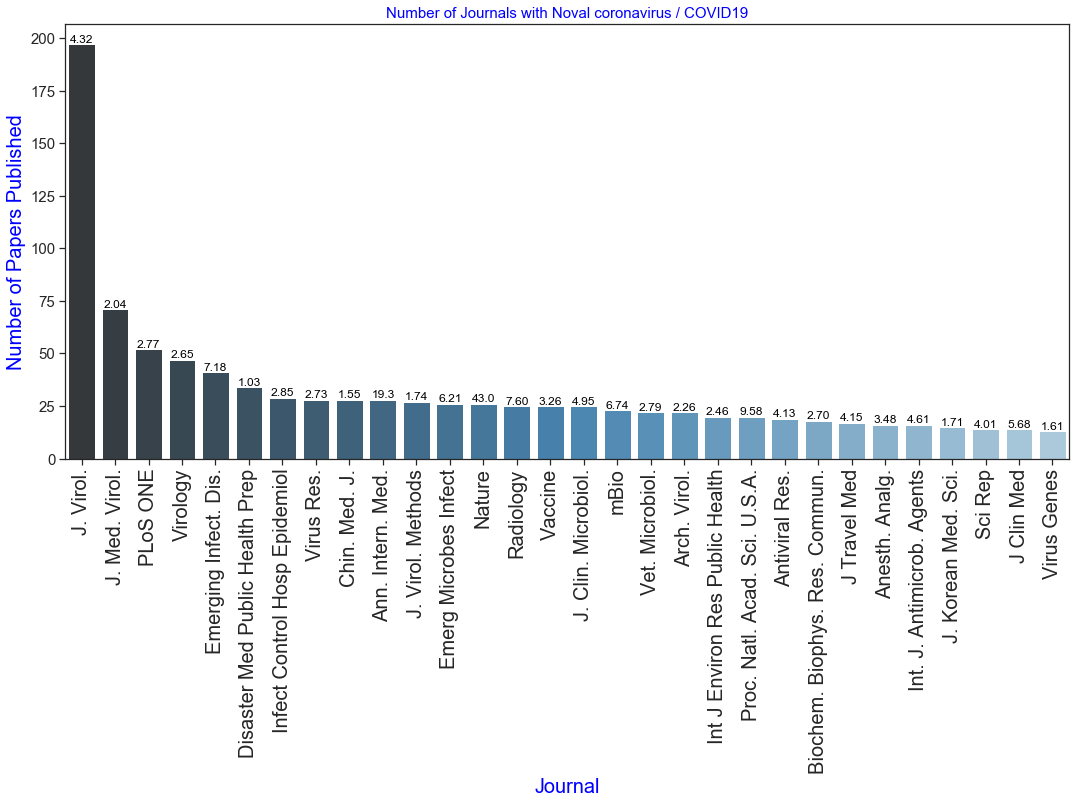

In [15]:
sns.set(rc={'figure.figsize':(18,8)}, style ='white')
sns.set_style("ticks")
total_published=  minus_reviews.groupby(['ISOAbbreviation', 'impact_factor'])[['PMID']].count()\
  .reset_index().sort_values('PMID', ascending = False).reset_index(drop= True).head(30)
g =sns.barplot(x = 'ISOAbbreviation', y = 'PMID', data = total_published, palette ="Blues_d", ci=None)
plt.xlabel('Journal',fontsize = 20, color = 'blue')
plt.ylabel('Number of Papers Published',fontsize = 20, color = 'blue')
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 15)
plt.title('Number of Journals with Noval coronavirus / COVID19', fontsize = 15, color = 'blue')

for index, row in total_published.iterrows():
    g.text(row.name,row.PMID, str(row.impact_factor[0:4]),color='black', ha="center", fontsize = 12, va='bottom')
plt.savefig("../data/journals.png")
plt.show();

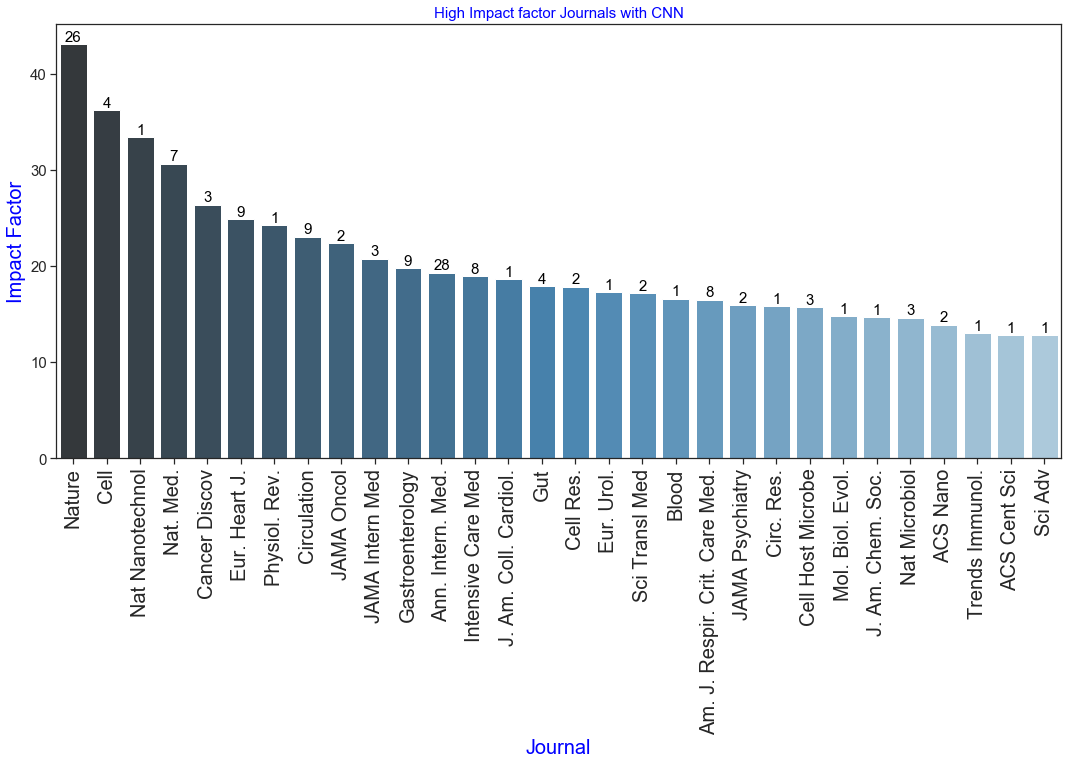

In [16]:
sns.set(rc={'figure.figsize':(18,8)}, style ='white')
sns.set_style("ticks")
highimpact_journal= minus_reviews.groupby(['ISOAbbreviation','impact_factor'])['PMID'].count()\
            .sort_values(ascending = False).reset_index()              
highimpact_journal['impact_factor']=highimpact_journal.impact_factor.str.replace('Not Available', "0.0")
highimpact_journal['impact_factor']=highimpact_journal.impact_factor.astype('float')
highimpact_journal=highimpact_journal.sort_values('impact_factor', ascending = False).reset_index()
highimpact_journal=highimpact_journal.drop('index', axis=1).head(30)
g =sns.barplot(x = 'ISOAbbreviation', y = 'impact_factor', data = highimpact_journal, palette ="Blues_d")
plt.xlabel('Journal',fontsize = 20, color = 'blue')
plt.ylabel('Impact Factor',fontsize = 20, color = 'blue')
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 15)
plt.title('High Impact factor Journals with CNN', fontsize = 15, color = 'blue')

for index, row in highimpact_journal.iterrows():
    g.text(row.name,row.impact_factor, round(row.PMID,1),color='black', ha="center", fontsize = 15, va='bottom')
    
plt.savefig("../data/journals_highimpact.png")
plt.show();